In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import arabic_reshaper
from bidi.algorithm import get_display

In [2]:
data = pd.read_csv("aqarmap_data/cleaned_housing_data.csv")
data.head()

,URL,Price,Rooms,Baths,Area,Lat,Lon,Floor,Finishing,Governate,Neighbourhood
0,https://aqarmap.com.eg/ar/listing/5923848-for-...,7900000,3,3,176,30.015287,30.983945,4,نصف تشطيب,القاهرة الكبرى,كمبوند تراس
1,https://aqarmap.com.eg/ar/listing/6108263-for-...,13000000,4,4,245,30.100866,31.632139,1,سوبر لوكس,القاهرة الكبرى,طريق مدينتي
2,https://aqarmap.com.eg/ar/listing/6418731-for-...,7500000,3,2,180,30.024799,31.516782,1,سوبر لوكس,القاهرة الكبرى,اللوتس الجديدة
3,https://aqarmap.com.eg/ar/listing/6501759-for-...,8400000,4,3,230,30.034311,31.461851,1,اكسترا سوبر لوكس,القاهرة الكبرى,شارع الجابري
4,https://aqarmap.com.eg/ar/listing/6320579-for-...,3200000,2,1,116,29.986745,31.319028,1,سوبر لوكس,القاهرة الكبرى,كمبوند أشجار دارنا


## Exploring the numaric features

In [3]:
numeric_data = data.select_dtypes(include=[np.number])

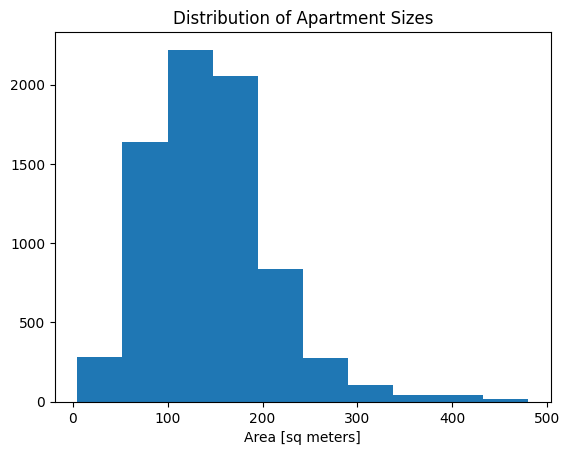

In [4]:
plt.hist(numeric_data["Area"])
plt.xlabel("Area [sq meters]")
plt.title("Distribution of Apartment Sizes");

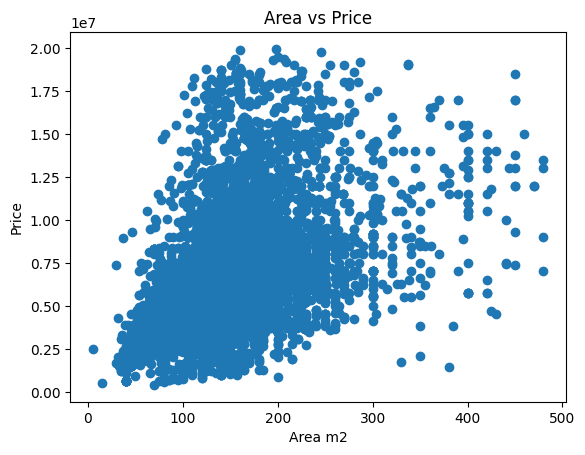

In [5]:
plt.scatter(data=numeric_data,x="Area",y="Price")
plt.xlabel("Area m2")
plt.ylabel("Price")
plt.title("Area vs Price");

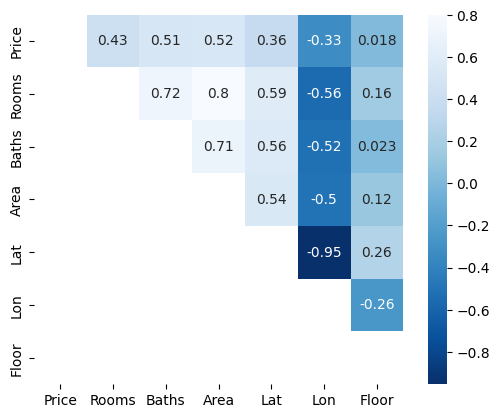

In [6]:
corr = numeric_data.corr()
mask = np.tril(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, cmap="Blues_r", annot=True, square=True);

In [11]:
fig = px.scatter_mapbox(   
    data, 
    lat= "Lat",
    lon= "Lon",
    width=600,  
    height=600,  
    color= "Price",
    hover_data=["Price"],  
)

fig.update_layout(mapbox_style="open-street-map")

fig.show();

C:\Users\Muhammed\AppData\Local\Temp\ipykernel_6120\2667504206.py:1: DeprecationWarning:

*scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/



In [12]:
# 3D scatter plot
fig = px.scatter_3d(
    data,
    x= "Lon",
    y= "Lat",
    z= "Price",
    labels={"Lon": "longitude", "Lat": "latitude", "Price": "price"},
    width=600,
    height=500,
)

# Refine formatting
fig.update_traces(
    marker={"size": 4, "line": {"width": 2, "color": "DarkSlateGrey"}},
    selector={"mode": "markers"},
)

fig.show();

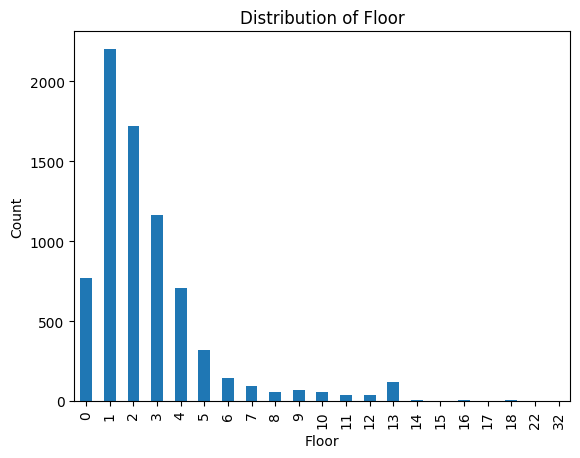

In [13]:
numeric_data["Floor"].value_counts().sort_index().plot(kind="bar")
plt.xlabel("Floor")
plt.ylabel("Count")
plt.title("Distribution of Floor")
plt.show()


## Exploring Categorical Features

In [18]:
data.select_dtypes(include=["object"]).nunique()

URL              7496
Finishing           5
Governate          17
Neighbourhood    1380
dtype: int64

In [19]:
mean_price_by_region = data.groupby("Governate")["Price"].mean().sort_values(ascending=False)
mean_price_by_region.round(2)


Governate
العين السخنة                  9049600.00
الساحل الشمالي                8400300.58
الاسكندرية                    7935916.52
الجيزة                        7600000.00
القاهرة الكبرى                7099694.81
الدقهلية                      4270750.00
البحر الأحمر                  4071186.47
الشرقية                       3700000.00
التوسعات السياحية الشمالية    3600000.00
دمياط                         3366045.45
مرسى مطروح                    3353750.00
السويس                        2443181.82
بور سعيد                      2250000.00
المنيا                        1980000.00
الاسماعيلية                   1000000.00
القليوبية                      700000.00
المنوفية                       575000.00
Name: Price, dtype: float64

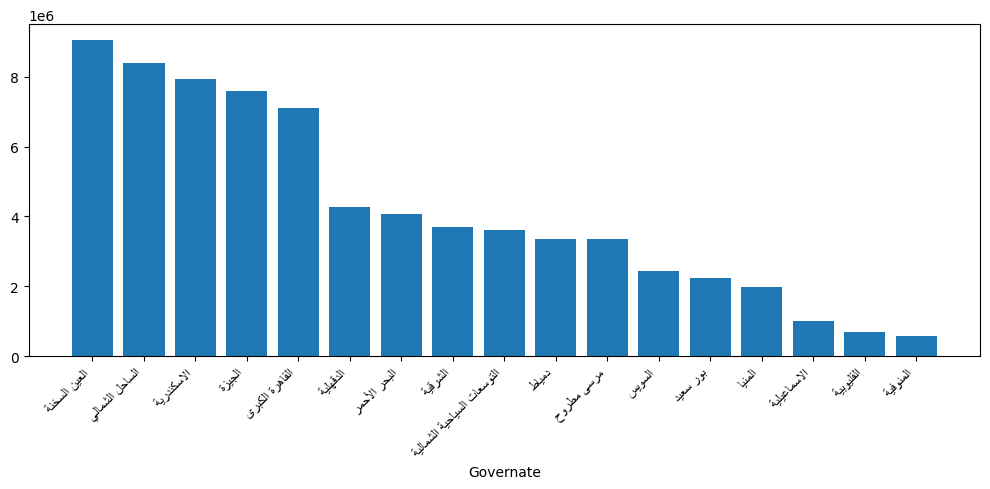

In [20]:
# Reshape and reorder Arabic labels
reshaped_labels = [get_display(arabic_reshaper.reshape(label)) for label in mean_price_by_region.index]

plt.figure(figsize=(10, 5))
plt.bar(reshaped_labels, mean_price_by_region.values)
plt.xlabel("Governate")  
plt.xticks(rotation=45, ha='right', fontsize=10, fontname='Arial')
plt.tight_layout()
plt.show()

In [21]:
data["Finishing"].value_counts()

Finishing
سوبر لوكس           2843
نصف تشطيب           1985
اكسترا سوبر لوكس    1749
بدون تشطيب           772
لوكس                 163
Name: count, dtype: int64

in our model we need to drop high cardinality features (Neighbourhood and url)